### analyze and evaluate the Titanic dataset and improve the accuracy of the survival prediction model ###

**Seaborn and Pandas are both used for data analysis in Python, but they have different roles. Here, Pandas is used for managing and processing DataFrame data, while Seaborn is used for visualization.**

In [1]:
import pandas as pd
import seaborn as sns

**Loading and Viewing the Dataset(Download dataset file from git or Kaggel)**

In [2]:
df=pd.read_csv('~/Downloads/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Finding missing values in each column.**

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**The describe() function in a DataFrame is used to display a summary of the data's statistics. This function provides information about the mean, standard deviation, minimum, maximum, and other statistical values for each numerical (or categorical) column in Pandas.**

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**The df.info() function in Pandas is used to display general information about a DataFrame. This function provides details such as the number of rows, the data types of each column, the number of non-null values, and memory usage.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


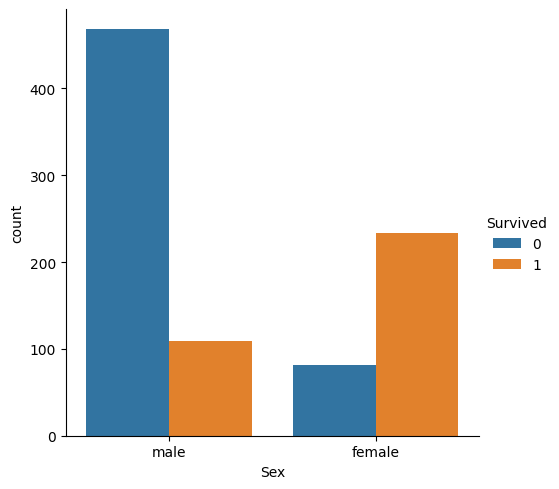

In [7]:
sns.catplot(x='Sex',hue='Survived',data=df,kind='count');

In [8]:
# Finding survivors based on gender.
df.groupby('Sex')['Survived'].aggregate(lambda x:x.sum()/len(x))

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [9]:
# Finding survivors based on Pclass.
data=df.groupby(['Survived','Pclass']).size().unstack()
print(data)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


### Plotting Data ###

The Heatmap is a type of thermal chart where data is displayed in a matrix, and different colors represent varying values in the cells of the matrix. This chart is commonly used to display:

1-Correlation matrices between different features in a dataset
2-The frequency or distribution of data in two-dimensional tables

<Axes: xlabel='Pclass', ylabel='Survived'>

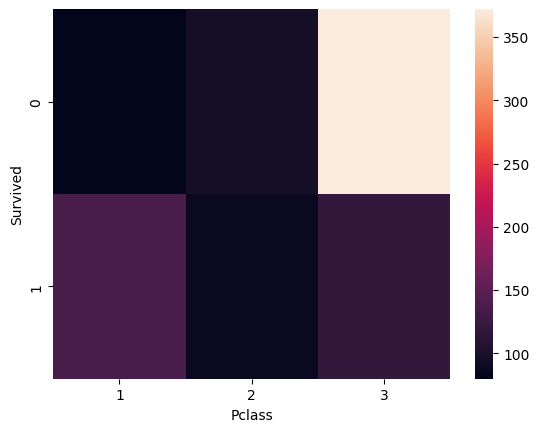

In [10]:
sns.heatmap(data)

<Axes: xlabel='Pclass', ylabel='Survived'>

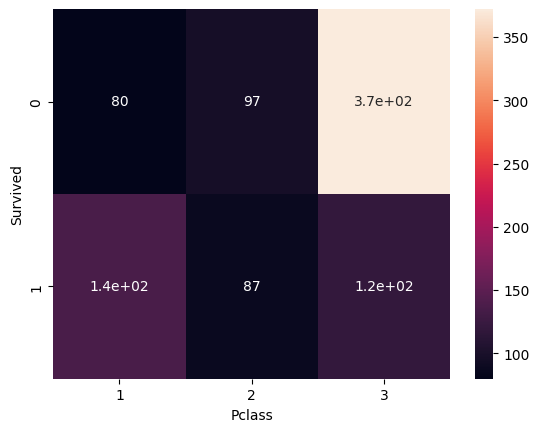

In [11]:
sns.heatmap(data,annot=True)

<Axes: xlabel='Pclass', ylabel='Survived'>

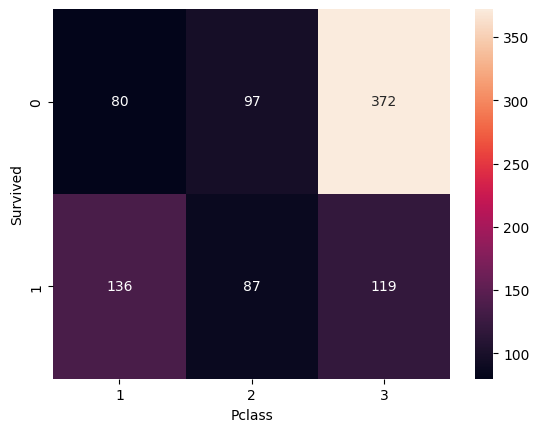

In [12]:
sns.heatmap(data,annot=True,fmt='d')

catplot is a function in the Seaborn library used for drawing categorical plots. This function provides a high-level interface for creating plots such as:Box Plot,Violin Plot,Strip Plot
Swarm Plot
Bar Plot
Point Plot
Count Plot

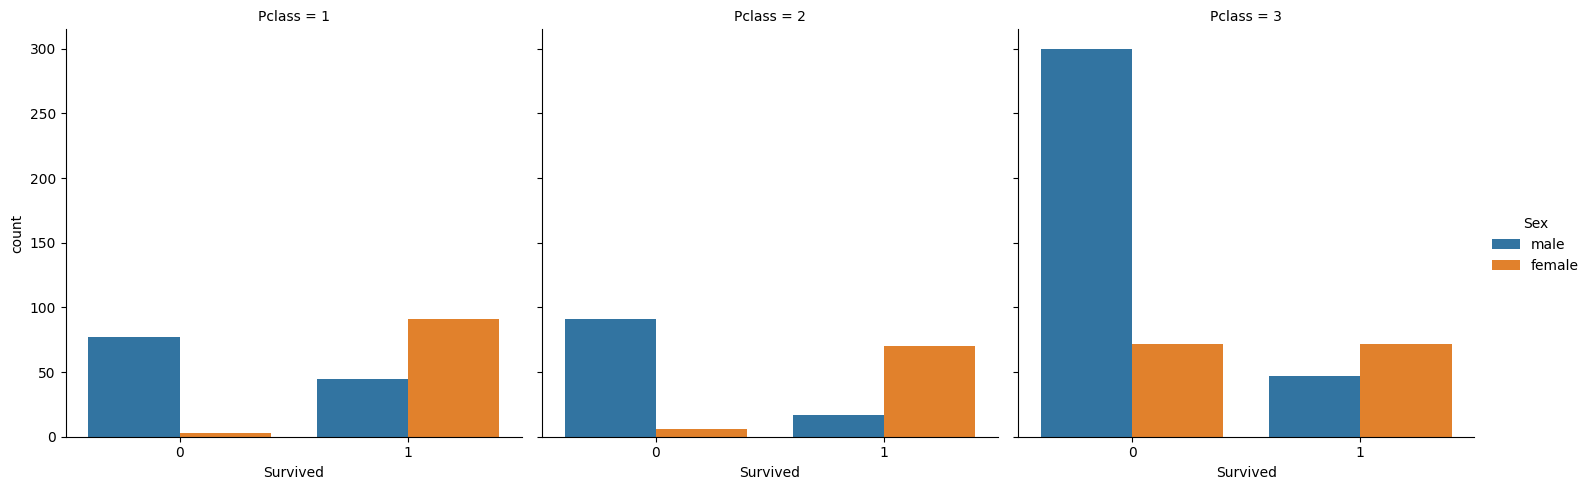

In [13]:
sns.catplot(x='Survived',hue='Sex',col='Pclass',data=df,kind='count')

### Data Cleaning ###

In [6]:
# 1:This function fills NaN values with the last available value before them.
df=df.ffill()
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [7]:
# 2:drop unnecessary columns/rows
df=df.drop(columns=['Name','Ticket','Cabin','PassengerId'])

### Feature Engineering ###

In [8]:
# LabelEncoder is a class from the sklearn.preprocessing library used to convert categorical data to numerical data.
#This tool is commonly used to convert textual or categorical features (such as gender, color, or type) into numbers 
#so that machine learning algorithms can work with them.


from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])


In [9]:
target=df['Survived']
df=df.drop(columns=['Survived']) #Survived column is target so we should remove it to prevent overfitting.

In [10]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,19.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


### Splitting Data into Training and Testing Sets ###

In [20]:
df['Age']=df['Age'].fillna(0)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,target,test_size=0.25, random_state=42) # target is target=df['Survived']

### SVM ###

In [21]:
# The code imports the svm module from scikit-learn, creates a Support Vector Classifier (SVC),
# fits it on the training data (x_train and y_train),
# and then uses the trained model to predict the labels for x_test, storing the predictions in s_predicted.

from sklearn import svm

s=svm.SVC().fit(x_train,y_train)
s_predicted=s.predict(x_test)

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test,s_predicted))

              precision    recall  f1-score   support

           0       0.65      0.93      0.77       134
           1       0.71      0.25      0.37        89

    accuracy                           0.66       223
   macro avg       0.68      0.59      0.57       223
weighted avg       0.67      0.66      0.61       223



### DecisionTreeClassifier ###

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier().fit(x_train,y_train)
dt_predicted=dt.predict(x_test)

In [24]:
print(metrics.classification_report(y_test,dt_predicted))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       134
           1       0.68      0.73      0.71        89

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



### RandomForestRegressor ###

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor().fit(x_train,y_train)
rf_predicted=rf.predict(x_test)

In [26]:

from sklearn.metrics import mean_squared_error
# ارزیابی مدل
print("Mean Squared Error:", mean_squared_error(y_test, rf_predicted))

Mean Squared Error: 0.15143918526201378


### AdaBoostClassifier ###

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# split the data
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=42)

# Basic LinearSVC model
base_model = LinearSVC(max_iter=10000)

# AdaBoost model with 'SAMME' algorithm
adaboost = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42, algorithm='SAMME')
from sklearn.model_selection import cross_val_score

# Using cross-validation for better evaluation
scores = cross_val_score(adaboost,df, target, cv=5)  # cv=5 یعنی تقسیم داده‌ها به 5 بخش
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

adaboost.fit(x_train, y_train)

# prediction
y_pred = adaboost.predict(x_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Cross-Validation Scores: [0.75418994 0.80898876 0.76966292 0.78089888 0.81460674]
Mean Accuracy: 0.785669449500973
Accuracy: 0.7985074626865671


### XGBClassifier ###

In [28]:
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

# split the data
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=42)

# Creating an XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Model training
xgb_model.fit(x_train, y_train)

# prediction
y_pred = xgb_model.predict(x_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with XGBoost:", accuracy)


Accuracy with XGBoost: 0.7947761194029851


### MLPClassifier (Multi Layer Percepteron) NeoralNetwork ###

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the data
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Creating a neural network model
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

# Model training
mlp_model.fit(x_train, y_train)

# prediction
y_pred = mlp_model.predict(x_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Neural Network:", accuracy)


Accuracy with Neural Network: 0.7821229050279329


### Comparison of classification algorithms ###

0:	learn: 0.6623561	total: 644us	remaining: 63.9ms
1:	learn: 0.6309043	total: 1.2ms	remaining: 58.7ms
2:	learn: 0.6072556	total: 1.44ms	remaining: 46.5ms
3:	learn: 0.5825539	total: 1.9ms	remaining: 45.6ms
4:	learn: 0.5604608	total: 2.39ms	remaining: 45.4ms
5:	learn: 0.5432121	total: 2.77ms	remaining: 43.4ms
6:	learn: 0.5264613	total: 3.27ms	remaining: 43.4ms
7:	learn: 0.5111308	total: 3.72ms	remaining: 42.8ms
8:	learn: 0.4998120	total: 4.04ms	remaining: 40.9ms
9:	learn: 0.4880692	total: 4.42ms	remaining: 39.7ms
10:	learn: 0.4788704	total: 4.88ms	remaining: 39.4ms
11:	learn: 0.4717463	total: 5.36ms	remaining: 39.3ms
12:	learn: 0.4661604	total: 5.72ms	remaining: 38.3ms
13:	learn: 0.4604273	total: 6.22ms	remaining: 38.2ms
14:	learn: 0.4540260	total: 6.75ms	remaining: 38.2ms
15:	learn: 0.4481806	total: 7.3ms	remaining: 38.3ms
16:	learn: 0.4428424	total: 7.8ms	remaining: 38.1ms
17:	learn: 0.4385496	total: 8.4ms	remaining: 38.3ms
18:	learn: 0.4339101	total: 8.89ms	remaining: 37.9ms
19:	learn

/var/folders/b1/j7bxlsgn4wj0vdb4f570sq4m0000gn/T/ipykernel_965/2392863990.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Blues_d")


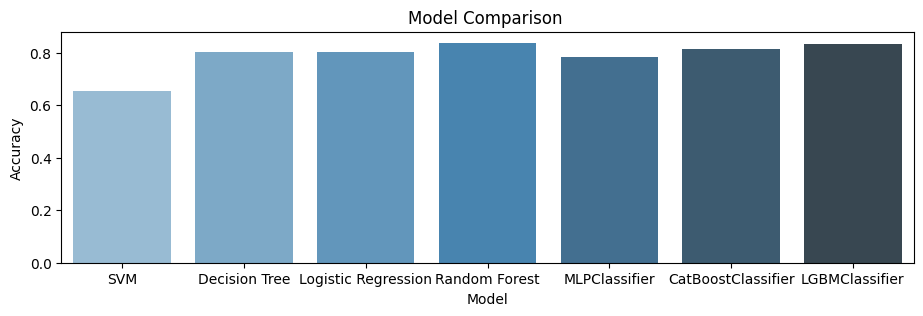

       Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0        SVM  0.653631   0.750000  0.243243  0.367347  0.813642
1  Decisi...  0.804469   0.760000  0.770270  0.765101  0.807593
2  Logist...  0.804469   0.782609  0.729730  0.755245  0.887773
3  Random...  0.837989   0.808219  0.797297  0.802721  0.885907
4  MLPCla...  0.782123   0.739726  0.729730  0.734694  0.877606
5  CatBoo...  0.815642   0.815385  0.716216  0.762590  0.895624
6  LGBMCl...  0.832402   0.805556  0.783784  0.794521  0.892021


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier



# data
data = load_iris()
X, y = df, target

# We select only two classes (for simplicity).
X = X[y != 2]
y = y[y != 2]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# models
models = {
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "MLPClassifier":MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42),
    "CatBoostClassifier":CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42),   
    "LGBMClassifier":lgb.LGBMClassifier(n_estimators=100, random_state=42)
     
    
    
}

# Save the results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

# Convert to DataFrame

results_df = pd.DataFrame(results)

# Draw a diagram

plt.figure(figsize=(11, 3))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Blues_d")
plt.title("Model Comparison ")
plt.show()

# Display all criteria
print(results_df)









### Conclusion ###

Based on the results, it can be concluded that: - The **SVM model** has poor performance with an accuracy of 65.4% and a low recall of 24.3%, meaning it struggles to identify positive cases (survival). - Other models like Decision Tree, Logistic Regression, Random Forest, MLP Classifier, CatBoost, and LGBM perform better. - The **Random Forest model** has the highest accuracy (83.8%) with precision (80.8%), recall (79.7%), and F1 score (80.3%) indicating a good balance in model performance. - Moreover, the **CatBoost** and **LGBM models** have high ROC-AUC values (89.6% and 89.2%, respectively), which shows strong ability to differentiate between positive and negative classes. Thus, for survival prediction and improving model accuracy, it is recommended to use models like Random Forest, CatBoost, or LGBM. for 5 seconds
Based on the results, we can conclude that:

The SVM model performs poorly with an accuracy of 65.4% and a recall of only 24.3%, indicating a low ability to identify positive cases (survivors).
Other models, such as Decision Tree, Logistic Regression, Random Forest, MLP Classifier, CatBoost, and LGBM, have delivered better performance.
The Random Forest model shows the highest accuracy (83.8%), and its precision (80.8%), recall (79.7%), and F1 score (80.3%) indicate a well-balanced performance.
Additionally, the CatBoost and LGBM models have high ROC-AUC values (89.6% and 89.2% respectively), demonstrating a strong ability to distinguish between positive and negative classes.

**Therefore, for predicting survival and improving model accuracy, it is recommended to use models such as Random Forest, CatBoost, or LGBM.**